In [4]:
import sqlite3 as sq3
import pandas.io.sql as pds
import pandas as pd
import numpy as np

In [12]:
pwd


'C:\\Users\\hp\\Desktop\\machine learning'

In [5]:
path='c:/users/hp/desktop/machine learning/iris.csv'
data=pd.read_csv(path)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
print(data.shape[0])

150


In [7]:
print(data.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')>


In [8]:
print(data.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [9]:
data['species']=data.species.str.replace("Iris-","")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
data.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [11]:
stats_df=data.describe()
stats_df.loc['range']=stats_df.loc['max']-stats_df.loc['min']
out_fields=['mean','25%','50%','75%','range']
stats_df=stats_df.loc[out_fields]
stats_df.rename({'50%':'median'}, inplace=True)
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.057333,3.758,1.199333
25%,5.100000,2.800000,1.600,0.300000
median,5.800000,3.000000,4.350,1.300000
75%,6.400000,3.300000,5.100,1.800000
range,3.600000,2.400000,5.900,2.400000


In [25]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [26]:
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [29]:
data.groupby('species').agg(['mean','median'])
data.groupby('species').agg([np.mean, np.median])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.428    3.4        1.462   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.246    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [30]:
from pprint import pprint

In [32]:
agg_dict={field:['mean','median'] for field in data.columns if field !='species'}
agg_dict['petal_length']= 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.428    3.4          1.9       0.246   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

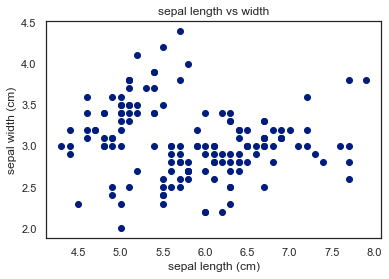

In [15]:
ax =plt.axes()
ax.scatter(data.sepal_length, data.sepal_width)
ax.set(xlabel='sepal length (cm)', 
      ylabel='sepal width (cm)',
      title='sepal length vs width');


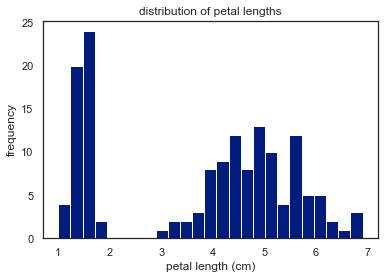

In [16]:
ax=data.petal_length.plot.hist(bins=25);
ax.set(xlabel='petal length (cm)',
      ylabel='frequency',
      title='distribution of petal lengths');

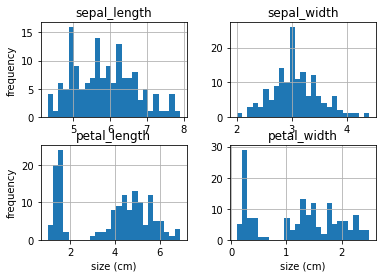

In [40]:
axList=data.hist(bins=25)
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('frequency')

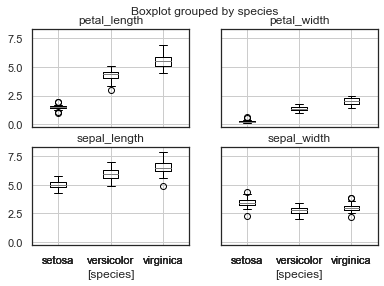

In [17]:
data.boxplot(by='species');

In [1]:
import seaborn as sns

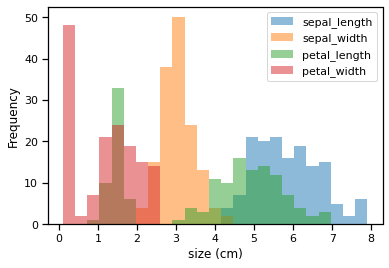

In [12]:
sns.set_context('notebook')
ax=data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('size (cm)');

In [25]:
plot_data= (data
           .set_index('species')
           .stack()
           .to_frame()
           .reset_index()
           .rename(columns={0:'size', 'level_1':'measurement'})
           )
plot_data.head

<bound method NDFrame.head of        species   measurement  size
0       setosa  sepal_length   5.1
1       setosa   sepal_width   3.5
2       setosa  petal_length   1.4
3       setosa   petal_width   0.2
4       setosa  sepal_length   4.9
..         ...           ...   ...
595  virginica   petal_width   2.3
596  virginica  sepal_length   5.9
597  virginica   sepal_width   3.0
598  virginica  petal_length   5.1
599  virginica   petal_width   1.8

[600 rows x 3 columns]>

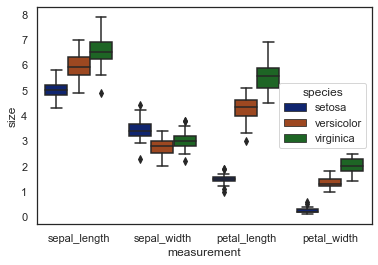

In [26]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')
f= plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y= 'size',
           hue='species', data=plot_data);